In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
# Shuffle the datasets
import random
brainT 
np.random.shuffle(brainT)
print(brainT)

[[ 1.0  5.0  208.8 ...  2.2  1.0  0.0]
 [ 0.0  11.1  1032.2 ...  3.8  1.0  0.0]
 [ 0.0  9.2  365.2 ...  2.8  1.0  0.0]
 ...
 [ 1.0  2.7  353.6 ...  8.7  0.9  0.0]
 [ 0.0  1.0  54.4 ...  4.3  0.9  0.0]
 [ 0.0  7.9  626.0 ...  3.7  1.0  0.0]]


In [6]:
#Dropping everything below 60% accuracy
brainT = np.delete(brainT, 13, axis = 1)
brainT = np.delete(brainT, 12, axis = 1)
brainT = np.delete(brainT, 1, axis = 1)
print(brainT)

[[ 1.0  208.8  14.5 ...  0.0  0.6  2.2]
 [ 0.0  1032.2  32.1 ...  0.2  0.6  3.8]
 [ 0.0  365.2  19.1 ...  0.1  0.6  2.8]
 ...
 [ 1.0  353.6  18.8 ...  0.0  0.4  8.7]
 [ 0.0  54.4  7.4 ...  0.2  0.6  4.3]
 [ 0.0  626.0  25.0 ...  0.2  0.7  3.7]]


In [7]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [8]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
#build model for Training
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 1s 6ms/step - loss: 14.1317 - accuracy: 0.5023 - val_loss: 2.2653 - val_accuracy: 0.4060
Epoch 2/500
83/83 [==============================] - 0s 4ms/step - loss: 1.6097 - accuracy: 0.3641 - val_loss: 1.1888 - val_accuracy: 0.2730
Epoch 3/500
83/83 [==============================] - 0s 3ms/step - loss: 1.0644 - accuracy: 0.3675 - val_loss: 0.8953 - val_accuracy: 0.4504
Epoch 4/500
83/83 [==============================] - 0s 4ms/step - loss: 0.8172 - accuracy: 0.4514 - val_loss: 0.7428 - val_accuracy: 0.5186
Epoch 5/500
83/83 [==============================] - 0s 4ms/step - loss: 0.7303 - accuracy: 0.5254 - val_loss: 0.8036 - val_accuracy: 0.4504
Epoch 6/500
83/83 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5778 - val_loss: 0.9903 - val_accuracy: 0.4504
Epoch 7/500
83/83 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.6443 - val_loss: 0.6909 - val_accuracy: 0.5230
Epoch 8/500


Epoch 59/500
83/83 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.8979 - val_loss: 0.4814 - val_accuracy: 0.7890
Epoch 60/500
83/83 [==============================] - 0s 4ms/step - loss: 0.3495 - accuracy: 0.8899 - val_loss: 0.3787 - val_accuracy: 0.8590
Epoch 61/500
83/83 [==============================] - 0s 5ms/step - loss: 0.3407 - accuracy: 0.8918 - val_loss: 0.6135 - val_accuracy: 0.7934
Epoch 62/500
83/83 [==============================] - 0s 5ms/step - loss: 0.3395 - accuracy: 0.8933 - val_loss: 0.4481 - val_accuracy: 0.8697
Epoch 63/500
83/83 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.8846 - val_loss: 0.3657 - val_accuracy: 0.9087
Epoch 64/500
83/83 [==============================] - 0s 4ms/step - loss: 0.3370 - accuracy: 0.8880 - val_loss: 0.3446 - val_accuracy: 0.8927
Epoch 65/500
83/83 [==============================] - 0s 4ms/step - loss: 0.3401 - accuracy: 0.8846 - val_loss: 0.3628 - val_accuracy: 0.9131
Epoch 

83/83 [==============================] - 0s 4ms/step - loss: 0.2672 - accuracy: 0.9210 - val_loss: 0.5862 - val_accuracy: 0.8085
Epoch 117/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2711 - accuracy: 0.9222 - val_loss: 0.3156 - val_accuracy: 0.9282
Epoch 118/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2693 - accuracy: 0.9180 - val_loss: 0.3627 - val_accuracy: 0.8972
Epoch 119/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2685 - accuracy: 0.9199 - val_loss: 0.3027 - val_accuracy: 0.9025
Epoch 120/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2703 - accuracy: 0.9169 - val_loss: 0.3719 - val_accuracy: 0.8440
Epoch 121/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2656 - accuracy: 0.9172 - val_loss: 0.2744 - val_accuracy: 0.9317
Epoch 122/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.9191 - val_loss: 0.3082 - val_accuracy: 0.9246
Epoch 123/500

83/83 [==============================] - 0s 4ms/step - loss: 0.2204 - accuracy: 0.9343 - val_loss: 0.2472 - val_accuracy: 0.9300
Epoch 174/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2204 - accuracy: 0.9355 - val_loss: 0.2347 - val_accuracy: 0.9468
Epoch 175/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2247 - accuracy: 0.9317 - val_loss: 0.2419 - val_accuracy: 0.9379
Epoch 176/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2182 - accuracy: 0.9355 - val_loss: 0.2314 - val_accuracy: 0.9433
Epoch 177/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2148 - accuracy: 0.9393 - val_loss: 0.2728 - val_accuracy: 0.9158
Epoch 178/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2197 - accuracy: 0.9339 - val_loss: 0.2225 - val_accuracy: 0.9530
Epoch 179/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2178 - accuracy: 0.9434 - val_loss: 0.3306 - val_accuracy: 0.8697
Epoch 180/500

83/83 [==============================] - 0s 4ms/step - loss: 0.1868 - accuracy: 0.9442 - val_loss: 0.1940 - val_accuracy: 0.9530
Epoch 231/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1887 - accuracy: 0.9442 - val_loss: 0.2452 - val_accuracy: 0.9335
Epoch 232/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9415 - val_loss: 0.3214 - val_accuracy: 0.9034
Epoch 233/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1911 - accuracy: 0.9434 - val_loss: 0.1873 - val_accuracy: 0.9601
Epoch 234/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1861 - accuracy: 0.9450 - val_loss: 0.1870 - val_accuracy: 0.9601
Epoch 235/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1845 - accuracy: 0.9514 - val_loss: 0.2042 - val_accuracy: 0.9450
Epoch 236/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1873 - accuracy: 0.9450 - val_loss: 0.2085 - val_accuracy: 0.9424
Epoch 237/500

83/83 [==============================] - 0s 4ms/step - loss: 0.1655 - accuracy: 0.9506 - val_loss: 0.1793 - val_accuracy: 0.9548
Epoch 288/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1690 - accuracy: 0.9487 - val_loss: 0.1672 - val_accuracy: 0.9628
Epoch 289/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1625 - accuracy: 0.9552 - val_loss: 0.5602 - val_accuracy: 0.7934
Epoch 290/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1620 - accuracy: 0.9552 - val_loss: 0.2151 - val_accuracy: 0.9353
Epoch 291/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1642 - accuracy: 0.9563 - val_loss: 0.1694 - val_accuracy: 0.9592
Epoch 292/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1688 - accuracy: 0.9503 - val_loss: 0.2081 - val_accuracy: 0.9441
Epoch 293/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1616 - accuracy: 0.9506 - val_loss: 0.8029 - val_accuracy: 0.7447
Epoch 294/500

83/83 [==============================] - 0s 4ms/step - loss: 0.1550 - accuracy: 0.9544 - val_loss: 0.2271 - val_accuracy: 0.9282
Epoch 345/500
83/83 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9586 - val_loss: 0.1723 - val_accuracy: 0.9557
Epoch 346/500
83/83 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9571 - val_loss: 0.1830 - val_accuracy: 0.9486
Epoch 347/500
83/83 [==============================] - 0s 3ms/step - loss: 0.1496 - accuracy: 0.9579 - val_loss: 0.1580 - val_accuracy: 0.9610
Epoch 348/500
83/83 [==============================] - 0s 3ms/step - loss: 0.1477 - accuracy: 0.9571 - val_loss: 0.1854 - val_accuracy: 0.9477
Epoch 349/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1517 - accuracy: 0.9563 - val_loss: 0.2186 - val_accuracy: 0.9344
Epoch 350/500
83/83 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9590 - val_loss: 0.2994 - val_accuracy: 0.9051
Epoch 351/500

83/83 [==============================] - 0s 4ms/step - loss: 0.1372 - accuracy: 0.9605 - val_loss: 0.2850 - val_accuracy: 0.9043
Epoch 402/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1341 - accuracy: 0.9639 - val_loss: 0.1497 - val_accuracy: 0.9654
Epoch 403/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1394 - accuracy: 0.9571 - val_loss: 0.2053 - val_accuracy: 0.9459
Epoch 404/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1386 - accuracy: 0.9605 - val_loss: 0.1418 - val_accuracy: 0.9637
Epoch 405/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1412 - accuracy: 0.9617 - val_loss: 0.1601 - val_accuracy: 0.9628
Epoch 406/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1392 - accuracy: 0.9651 - val_loss: 0.2499 - val_accuracy: 0.9176
Epoch 407/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1411 - accuracy: 0.9609 - val_loss: 0.1491 - val_accuracy: 0.9610
Epoch 408/500

83/83 [==============================] - 0s 4ms/step - loss: 0.1320 - accuracy: 0.9609 - val_loss: 0.1465 - val_accuracy: 0.9601
Epoch 459/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 0.9674 - val_loss: 0.1355 - val_accuracy: 0.9628
Epoch 460/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1274 - accuracy: 0.9643 - val_loss: 0.1505 - val_accuracy: 0.9628
Epoch 461/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1251 - accuracy: 0.9670 - val_loss: 0.1338 - val_accuracy: 0.9628
Epoch 462/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1256 - accuracy: 0.9639 - val_loss: 0.1364 - val_accuracy: 0.9690
Epoch 463/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1246 - accuracy: 0.9639 - val_loss: 0.1298 - val_accuracy: 0.9681
Epoch 464/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1228 - accuracy: 0.9666 - val_loss: 0.1634 - val_accuracy: 0.9539
Epoch 465/500

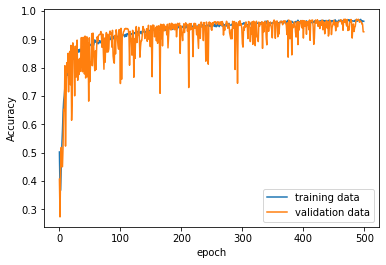

In [10]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N5check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [11]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9279


In [12]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9264


In [13]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 1.0]
 [ 0.0]
 [ 1.0]
 [ 0.0]
 [ 1.0]]
83/83 [==============================] - 0s 3ms/step
[[ 1.0]
 [ 0.1]
 [ 1.0]
 [ 0.0]
 [ 1.0]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.8694673668417104
0.9863829787234043
0.9242424242424243


In [15]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 1.0]
 [ 0.0]
 [ 0.0]
 [ 1.0]
 [ 1.0]]
36/36 [==============================] - 0s 2ms/step
[[ 0.5]
 [ 0.0]
 [ 0.0]
 [ 1.0]
 [ 1.0]]


In [16]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.8695652173913043
0.984251968503937
0.9233610341643583
